## Integration of Conntectie Tissue cells identified from total blastema and sorted senescent cells during limb regeneration

In [1]:
file.path(R.home("bin"), "R")

[1] "C:/Users/giovanni/anaconda3/envs/r4-base/lib/R/bin/x64/R"

In [2]:
setwd("C:/Users/giovanni/Desktop/GIOVA/Bioinformatics/wANDY/Paper/Notebooks/Seurat")

library(Seurat)
library(sctransform)
library(dplyr)
library(tidyverse)
library(readxl)
library(stringr)
library(HDF5Array)
library(ggplot2)
library(viridis)

library("BiocParallel")
register(SnowParam(4))

CDKN1A <- "AMEX60DD008688"
WNT7B <- "AMEX60DD006490"
WNT8B <- "AMEX60DD051636"

Warning message:
"package 'Seurat' was built under R version 4.0.4"
Attaching SeuratObject

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.0.5"
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'tidyr' was built under R version 4.0.4"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'readxl

In [4]:
## load Gerber
# GerberAxo <- readRDS(file = "Gerber_Seurat_NewAnno_GeneID.rds")
## Only prrx1 dataset
GerberAxo <- readRDS(file = "Gerber_Seurat_NewAnno_GeneID_prrx1_NoEarly.rds")
## CellTypes and dataset will be used to distinguish the cells
GerberAxo@meta.data[,"dataset"] = "Gerber"


In [5]:

table(GerberAxo@meta.data$Stage)
GerberAxo@meta.data$Stage <- factor(GerberAxo@meta.data$Stage)
table(GerberAxo@meta.data$Stage)
GerberAxo@meta.data[,"cellTypes"] = GerberAxo@meta.data[,"Stage"]


 Blastema_11dpa  Blastema_18dpa  Blastema_25dpa   Blastema_3dpa  Blastema_38dpa 
            163             135               0               0               0 
  Blastema_5dpa   Blastema_8dpa  Uninjured_0dpa  Uninjured_1apa  Uninjured_3mpa 
              0             121               0               0               0 
LimbField_Stg28   LimbBud_Stg40   LimbBud_Stg44 
              0               0               0 


Blastema_11dpa Blastema_18dpa  Blastema_8dpa 
           163            135            121 

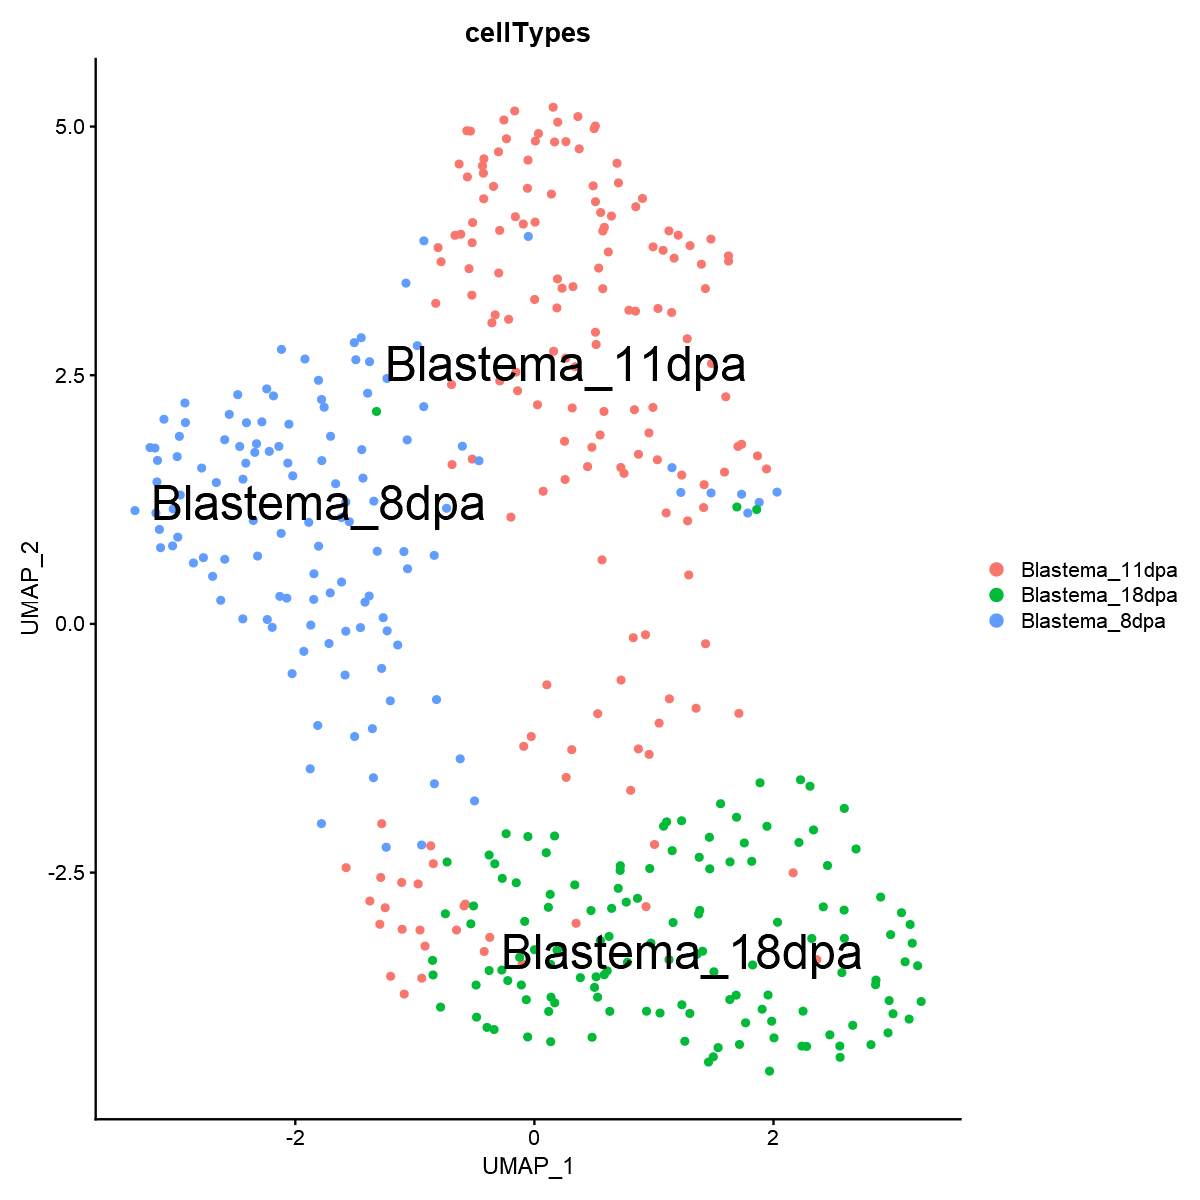

In [6]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(GerberAxo, reduction = "umap", pt.size = 1.5, group.by = "cellTypes", label = T, label.size = 10)# + NoLegend()

In [7]:
## load Andy
AndyAxo <- readRDS(file = "Yu_Seurat_NoEarly.rds")
AndyAxo@meta.data[,"dataset"] = "Yu"

In [8]:
AndyAxo <- subset(x = AndyAxo, subset = seurat_clusters == 2)
AndyAxo

An object of class Seurat 
133699 features across 250 samples within 2 assays 
Active assay: SCT (34481 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
#Final number of cells
table(AndyAxo@meta.data$orig.ident)


early  late   mid   pal 
    0   132    94    24 

In [10]:
# Integration

AndyAxo@meta.data$cellTypes <- AndyAxo@meta.data$orig.ident

Axolotl.list <- list(GerberAxo, AndyAxo)

Axolotl.features <- SelectIntegrationFeatures(object.list = Axolotl.list, nfeatures = 4000)
Axolotl.list <- PrepSCTIntegration(object.list = Axolotl.list, 
                                   anchor.features = Axolotl.features, 
                                   verbose = TRUE)


Axolotl.anchors <- FindIntegrationAnchors(object.list = Axolotl.list, 
                                          normalization.method = "SCT", 
                                          anchor.features = Axolotl.features, 
                                          verbose = TRUE)
Axolotl.integrated <- IntegrateData(anchorset = Axolotl.anchors, 
                                    normalization.method = "SCT", 
                                    verbose = TRUE)

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1127 anchors

Filtering anchors

	Retained 1115 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [11]:
# saveRDS(Axolotl.integrated, file = "Integrated_Seurat_NewAnno_filtered.rds")

In [12]:
table(Axolotl.integrated@meta.data$dataset)
table(Axolotl.integrated@meta.data$cellTypes)


Gerber     Yu 
   419    250 


Blastema_11dpa Blastema_18dpa  Blastema_8dpa           late            mid 
           163            135            121            132             94 
           pal 
            24 

In [13]:
Axolotl.integrated <- RunPCA(Axolotl.integrated, 
                             features = VariableFeatures(object = Axolotl.integrated))

PC_ 1 
Positive:  AMEX60DD028252, AMEX60DD025726, AMEX60DD015718, AMEX60DD030776, AMEX60DD001564, AMEX60DD015130, AMEX60DD004035, AMEX60DD031316, AMEX60DD032108, AMEX60DD025622 
	   AMEX60DD017593, AMEX60DD014742, AMEX60DD016261, AMEX60DD013399, AMEX60DD013519, AMEX60DD010769, AMEX60DD025725, AMEX60DD016567, AMEX60DD024981, AMEX60DD000167 
	   AMEX60DD021058, AMEX60DD034407, AMEX60DD052120, AMEX60DD049175, AMEX60DD025013, AMEX60DD043188, AMEX60DD001932, AMEX60DDU001004733, AMEX60DDU001010870, AMEX60DD026213 
Negative:  ERCC-00074, ERCC-00004, ERCC-00046, AY659991.25, AY659991.21, ERCC-00130, ERCC-00002, ERCC-00096, AY659991.50, ERCC-00136 
	   ERCC-00171, ERCC-00113, AMEX60DD029426, ERCC-00042, ERCC-00003, ERCC-00043, ERCC-00108, AMEX60DD005921, AMEX60DD033568, AMEX60DD010831 
	   AMEX60DD018809, AMEX60DD004178, AMEX60DD026961, ERCC-00009, AMEX60DD006010, AMEX60DD048972, AMEX60DD019413, AMEX60DD014606, AMEX60DD028164, ERCC-00060 
PC_ 2 
Positive:  AMEX60DD052120, AMEX60DD015130, AMEX60

In [14]:
dims.use = 1:50

Axolotl.integrated <- RunUMAP(Axolotl.integrated, dims = dims.use)
Axolotl.integrated <- FindNeighbors(Axolotl.integrated, dims = dims.use)
Axolotl.integrated <- FindClusters(Axolotl.integrated, resolution = 0.4)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
13:12:18 UMAP embedding parameters a = 0.9922 b = 1.112

13:12:18 Read 669 rows and found 50 numeric columns

13:12:18 Using Annoy for neighbor search, n_neighbors = 30

13:12:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:12:18 Writing NN index file to temp file C:\Users\giovanni\AppData\Local\Temp\RtmpSSukAC\file32b4397edc6

13:12:18 Searching Annoy index using 1 thread, search_k = 3000

13:12:19 Annoy recall = 100%

13:12:19 Commencing smooth kNN distance calibration using 1 thr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 669
Number of edges: 35667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7408
Number of communities: 3
Elapsed time: 0 seconds


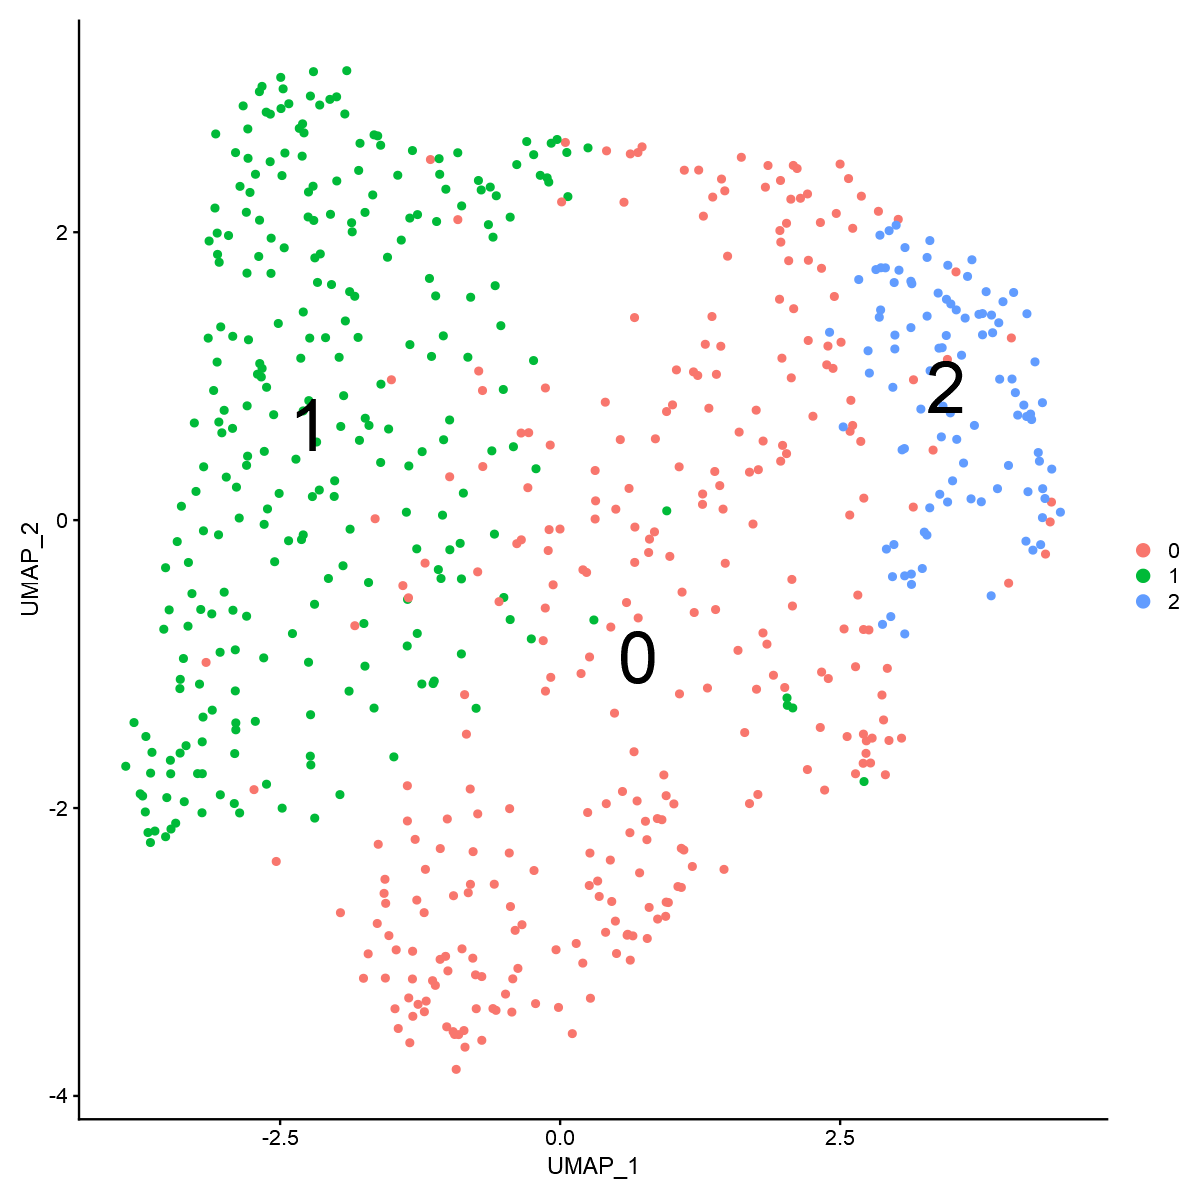

In [15]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 1.5, label = T, label.size = 15)# + NoLegend()

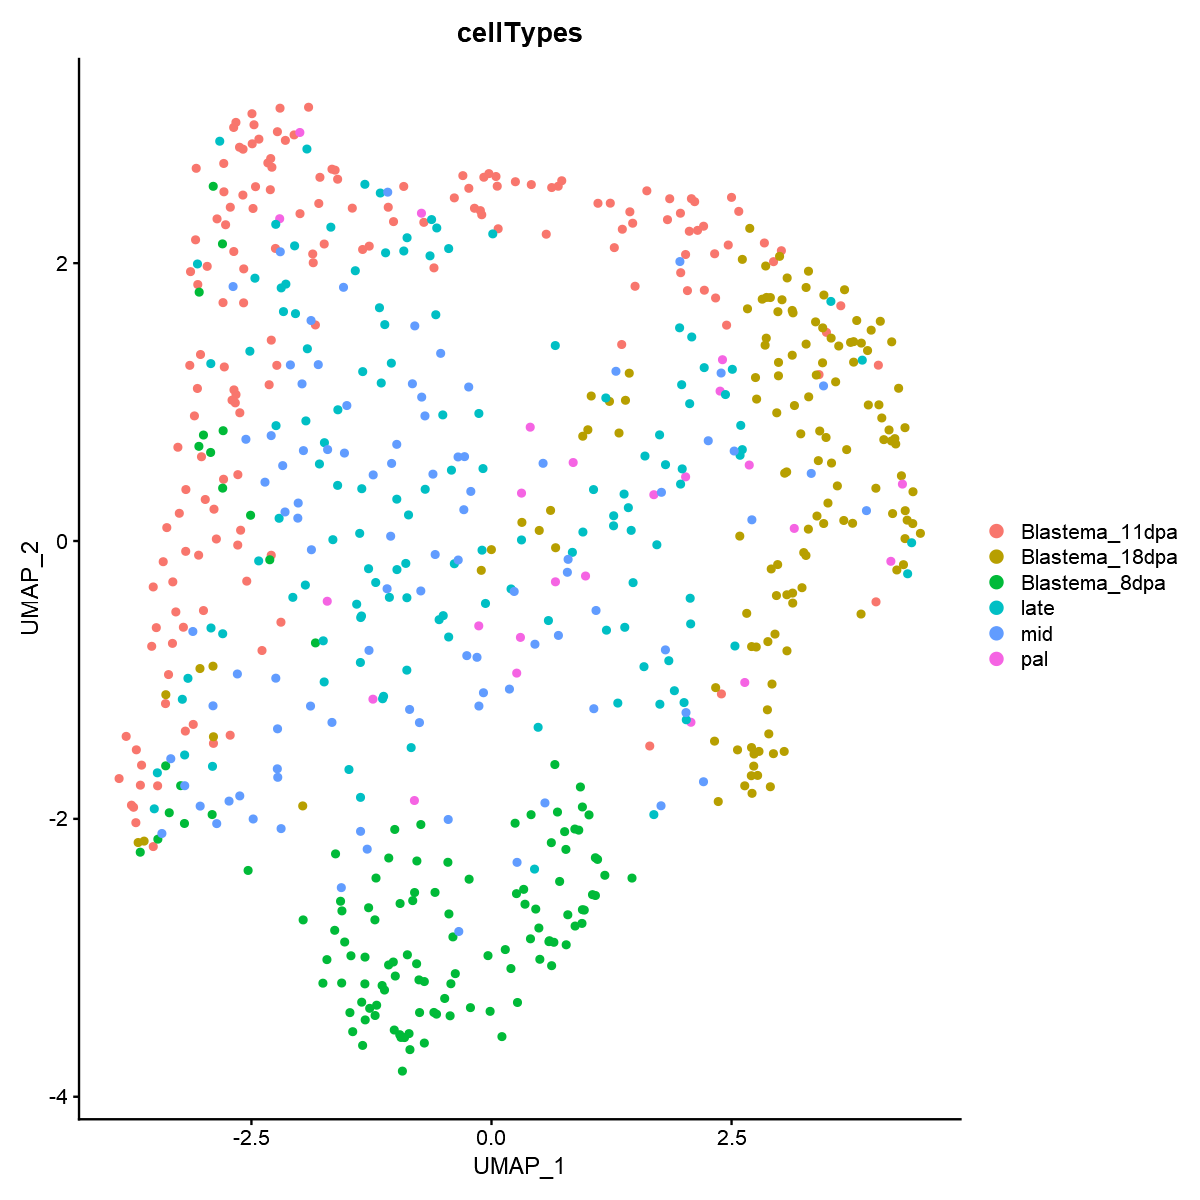

In [16]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 1.5, label = F, 
        label.size = 10, group.by = "cellTypes", repel = T)# + NoLegend()

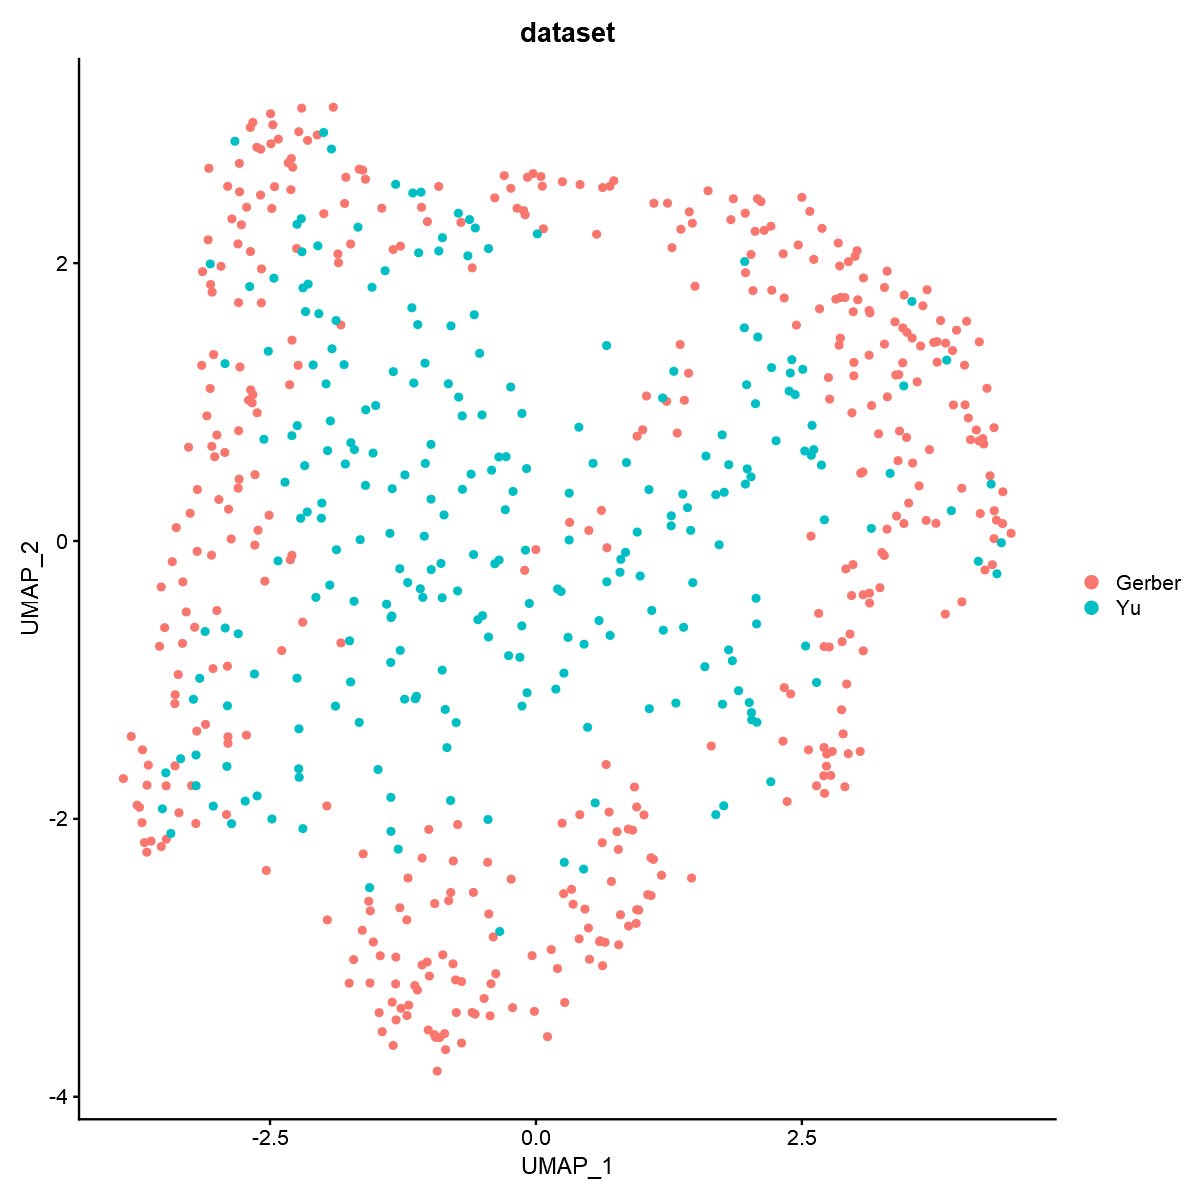

In [17]:
DimPlot(Axolotl.integrated, reduction = "umap", pt.size = 1.5, label = F, 
        label.size = 3, group.by = "dataset", repel = T) #+ NoLegend()

In [18]:
saveRDS(Axolotl.integrated, file = "integrated_CT_Yu_Gerber.rds")

In [19]:
# Set reticulate to use your preferred python version
reticulate::use_python("C:/Users/giovanni/anaconda3/envs/python39/python.exe")
reticulate::py_config()

python:         C:/Users/giovanni/anaconda3/envs/python39/python.exe
libpython:      C:/Users/giovanni/anaconda3/envs/python39/python39.dll
pythonhome:     C:/Users/giovanni/anaconda3/envs/python39
version:        3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/giovanni/anaconda3/envs/python39/Lib/site-packages/numpy
numpy_version:  1.20.3

python versions found: 
 C:/Users/giovanni/anaconda3/envs/python39/python.exe
 C:/Users/giovanni/anaconda3/python.exe
 C:/Users/giovanni/anaconda3/envs/4-rstudio/python.exe
 C:/Users/giovanni/anaconda3/envs/R-env/python.exe
 C:/Users/giovanni/anaconda3/envs/r4-base/python.exe
 C:/Users/giovanni/anaconda3/envs/spyder/python.exe

In [21]:
sceasy::convertFormat(Axolotl.integrated, from="seurat", to="anndata",
                       outFile='integrated_CT_Yu_Gerber.h5ad')

AnnData object with n_obs × n_vars = 669 × 99218
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Stage', 'Assay', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'dataset', 'cellTypes', 'SCT_snn_res.1', 'integrated_snn_res.0.4'
    var: 'name'
    obsm: 'X_pca', 'X_umap'